In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/meanie-nails-survey-responses/Meanie Ideas (Responses)4 khadija - Form Responses 1.csv


## Meanie Nails Survey Results
* **Author:** Khadija Hammawa <br>
* **Date:** 19/05/2021<br>
* **Overview:** 
This project contains survey results from [Meanie Nails](http://www.meanienails.com) . The survey was distributed to 22 people who were asked to rate nails on a scale of 1 to 10; where one means the client did not like the nail at all and ten means they loved the nail. The purpose of this analysis is to identify which nails scored highest and lowest across different statistical methods. Based on these findings those at [Meanie Nails](http://www.meanienails.com) can make more informed decisons about which nails they would like to sell in the future.


## 1. Import Libraries

In [2]:
# Python Libraries
import numpy as np
import pandas as pd

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Import Data

In [3]:
# Label Columns
cols = ['timestamp','fire_nails', 'heart_nails', 'pink_triangle', 'pink_v', 'green_snake', 'clear_fire', 'white_v', 'red_dragon', 'black_fire', 'fire_heart', 'holo_nails', 'irides_nails', 'gold_sparkle', 'yellow_heart', 'black_purple_nails', 'glossy_fire', 'glossy_french', 'glossy_white_v', 'blue_french', 'pink_pearls', 'white_curve_tip', 'clear_blue_fire', 'pink_ombre', 'purple_swirl', 'blackpink_nails', 'white_heart_tip', 'moo_cow', 'black_cow', 'split_french', 'silver_tips', 'black_tip_nail', 'pinkywinky', 'pink_flower_nail', 'brown_clear', 'bow_tie', 'white_swirl', 'clear_pink_white', 'comments'] 
data = pd.read_csv('../input/meanie-nails-survey-responses/Meanie Ideas (Responses)4 khadija - Form Responses 1.csv', header=0, names=cols, usecols=range(0, 38))
data = data.drop('timestamp', axis=1)


In [4]:
data

,fire_nails,heart_nails,pink_triangle,pink_v,green_snake,clear_fire,white_v,red_dragon,black_fire,fire_heart,...,black_cow,split_french,silver_tips,black_tip_nail,pinkywinky,pink_flower_nail,brown_clear,bow_tie,white_swirl,clear_pink_white
0,7,4,7,5,7,9,8,4,6,10,...,7,7,3,9,4,3,7,1,10,7
1,9,8,6,6,4,5,5,4,6,10,...,8,7,8,10,5,8,10,7,9,9
2,8,7,4,5,4,9,8,4,10,10,...,6,6,4,9,7,8,8,3,6,8
3,8,4,6,9,10,10,10,10,9,9,...,4,5,3,7,7,7,5,1,5,8
4,9,5,8,10,7,10,10,6,5,10,...,10,8,8,10,5,5,5,2,9,9
5,7,9,3,9,8,5,9,9,9,9,...,7,6,4,5,3,5,1,2,6,7
6,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
7,4,6,4,6,8,3,6,8,4,7,...,4,9,3,8,3,8,2,2,9,7
8,6,9,8,8,9,8,8,8,7,7,...,9,10,8,9,4,2,7,3,10,8
9,7,7,6,9,7,8,9,7,9,9,...,7,9,5,5,3,8,5,5,6,6


## 3. Correlation Heatmap
Here, I was able to use the corr() function to find the correlation among the columns (nails) in the data frame. Although the correlation is solely based on ratings, the heatmap can provide useful insights to [Meanie Nails](http://www.meanienails.com) in regards to how clients view similar or dissimilar nail designs. 

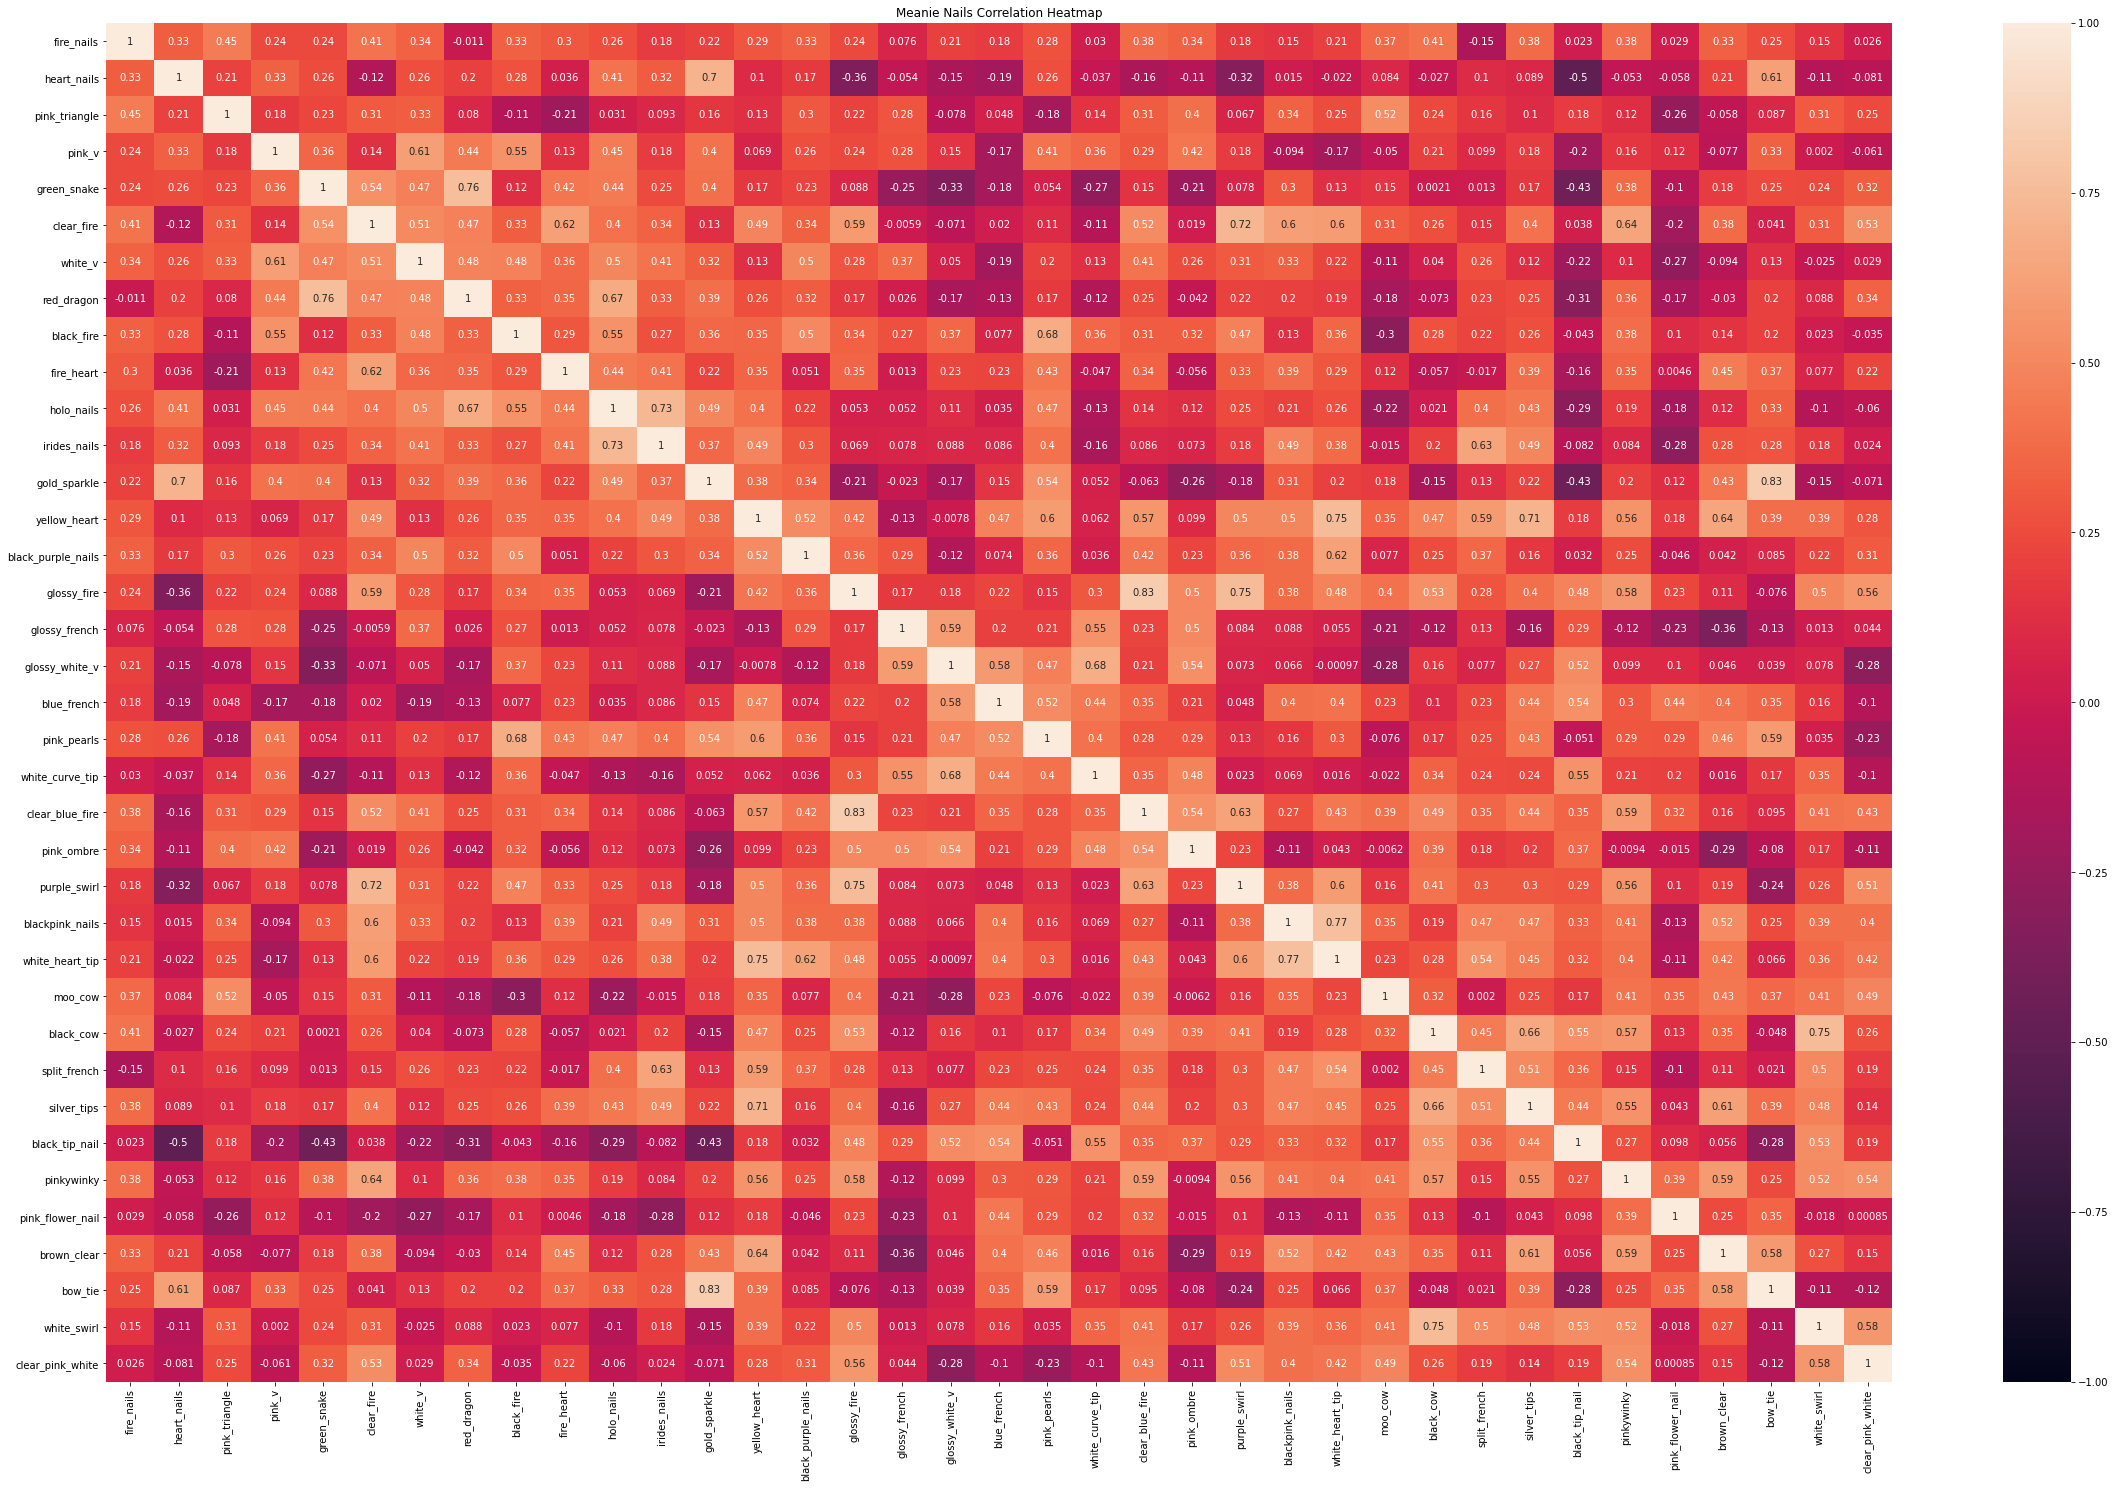

In [5]:
corr = data.corr()

plt.figure(figsize=(40, 25))
sns.heatmap(corr, annot=True, vmin=-1)
plt.title("Meanie Nails Correlation Heatmap")
plt.show()

## 4. Data Analysis
In this section, I was able to determine the mean, mode, and median of each nail column. Based on the results of the mean and median I compiled a list of the highest and lowest-rated nails in each section. 

### 4.1 Mean

In [6]:
means = []
avg_ratings = {}
for cols in data:
    mean = data[cols].mean()
    means.append(mean)
    avg_ratings[cols] = mean
    print(f'{cols} Average Rating: {(mean)}')

fire_nails Average Rating: 7.0
heart_nails Average Rating: 7.090909090909091
pink_triangle Average Rating: 6.409090909090909
pink_v Average Rating: 7.2272727272727275
green_snake Average Rating: 7.045454545454546
clear_fire Average Rating: 7.136363636363637
white_v Average Rating: 8.0
red_dragon Average Rating: 6.7272727272727275
black_fire Average Rating: 6.545454545454546
fire_heart Average Rating: 8.272727272727273
holo_nails Average Rating: 7.454545454545454
irides_nails Average Rating: 7.818181818181818
gold_sparkle Average Rating: 5.590909090909091
yellow_heart Average Rating: 5.545454545454546
black_purple_nails Average Rating: 5.363636363636363
glossy_fire Average Rating: 7.681818181818182
glossy_french Average Rating: 8.5
glossy_white_v Average Rating: 7.7272727272727275
blue_french Average Rating: 6.681818181818182
pink_pearls Average Rating: 6.318181818181818
white_curve_tip Average Rating: 7.045454545454546
clear_blue_fire Average Rating: 6.909090909090909
pink_ombre Averag

In [7]:
highest = means[0]
top_five_dic = {} #TOP 5 NAILS
for nail, rating in avg_ratings.items():
    if rating > highest:
        highest = rating
        top_five_dic[nail] = rating
print(f'TOP 5 NAILS BASED ON MEAN VALUES: {list(top_five_dic.keys())}')

TOP 5 NAILS BASED ON MEAN VALUES: ['heart_nails', 'pink_v', 'white_v', 'fire_heart', 'glossy_french']


In [8]:
lowest = means[0]
low_seven_dic = {} #LOWEST RATED NAILS
for nail, rating in avg_ratings.items():
    if rating < lowest:
        lowest = rating
        low_seven_dic[nail] = rating
print(f' LOWEST 7 NAILS BASED ON MEAN VALUES: {list(low_seven_dic.keys())}')

 LOWEST 7 NAILS BASED ON MEAN VALUES: ['pink_triangle', 'gold_sparkle', 'yellow_heart', 'black_purple_nails', 'silver_tips', 'pinkywinky', 'bow_tie']


### 4.2 Mode

In [9]:
mode_ratings = {}
for cols in data:
    mode = data[cols].mode()
    mode_ratings[cols]= list(mode)
print(mode_ratings)

{'fire_nails': [7], 'heart_nails': [7], 'pink_triangle': [6], 'pink_v': [7], 'green_snake': [8], 'clear_fire': [10], 'white_v': [8, 9, 10], 'red_dragon': [6, 8], 'black_fire': [9], 'fire_heart': [9, 10], 'holo_nails': [6, 9], 'irides_nails': [8, 10], 'gold_sparkle': [5, 10], 'yellow_heart': [5], 'black_purple_nails': [5], 'glossy_fire': [9], 'glossy_french': [10], 'glossy_white_v': [7], 'blue_french': [8], 'pink_pearls': [7, 10], 'white_curve_tip': [8], 'clear_blue_fire': [8], 'pink_ombre': [7, 10], 'purple_swirl': [10], 'blackpink_nails': [6], 'white_heart_tip': [7], 'moo_cow': [9], 'black_cow': [9], 'split_french': [9, 10], 'silver_tips': [8], 'black_tip_nail': [9], 'pinkywinky': [3], 'pink_flower_nail': [8], 'brown_clear': [9, 10], 'bow_tie': [2], 'white_swirl': [9], 'clear_pink_white': [7, 8]}


### 4.3 Median

In [10]:
medians = []
median_ratings = {}
for cols in data:
    median = data[cols].median()
    medians.append(median)
    median_ratings[cols] = median
    print(f'{cols} Median Rating: {median}')

fire_nails Median Rating: 7.0
heart_nails Median Rating: 7.0
pink_triangle Median Rating: 6.0
pink_v Median Rating: 7.0
green_snake Median Rating: 8.0
clear_fire Median Rating: 7.5
white_v Median Rating: 8.0
red_dragon Median Rating: 7.0
black_fire Median Rating: 6.0
fire_heart Median Rating: 9.0
holo_nails Median Rating: 8.0
irides_nails Median Rating: 8.0
gold_sparkle Median Rating: 5.0
yellow_heart Median Rating: 5.0
black_purple_nails Median Rating: 5.0
glossy_fire Median Rating: 8.0
glossy_french Median Rating: 9.0
glossy_white_v Median Rating: 7.5
blue_french Median Rating: 7.0
pink_pearls Median Rating: 6.5
white_curve_tip Median Rating: 8.0
clear_blue_fire Median Rating: 7.0
pink_ombre Median Rating: 8.0
purple_swirl Median Rating: 8.0
blackpink_nails Median Rating: 6.0
white_heart_tip Median Rating: 7.0
moo_cow Median Rating: 7.5
black_cow Median Rating: 7.5
split_french Median Rating: 8.0
silver_tips Median Rating: 5.5
black_tip_nail Median Rating: 9.0
pinkywinky Median Ratin

In [11]:
highest = medians[0]
top_dic = {}
for nail, rating in median_ratings.items():
    if rating > highest:
        highest = rating
        top_dic[nail] = rating
print(f'TOP 2 NAILS BASED ON MEDIAN VALUES: {list(top_dic.keys())}')

TOP 2 NAILS BASED ON MEDIAN VALUES: ['green_snake', 'fire_heart']


In [12]:
lowest = medians[0]
low_dic = {}
for nail, rating in median_ratings.items():
    if rating < lowest:
        lowest = rating
        low_dic[nail] = int(rating)
print(f'LOWEST 4 NAILS BASED ON MEDIAN VALUES: {list(low_dic.keys())}')

LOWEST 4 NAILS BASED ON MEDIAN VALUES: ['pink_triangle', 'gold_sparkle', 'pinkywinky', 'bow_tie']


## 5. Visualization
In this section, I simply provided a visual of the mean and median results.

### 5.1 Mean

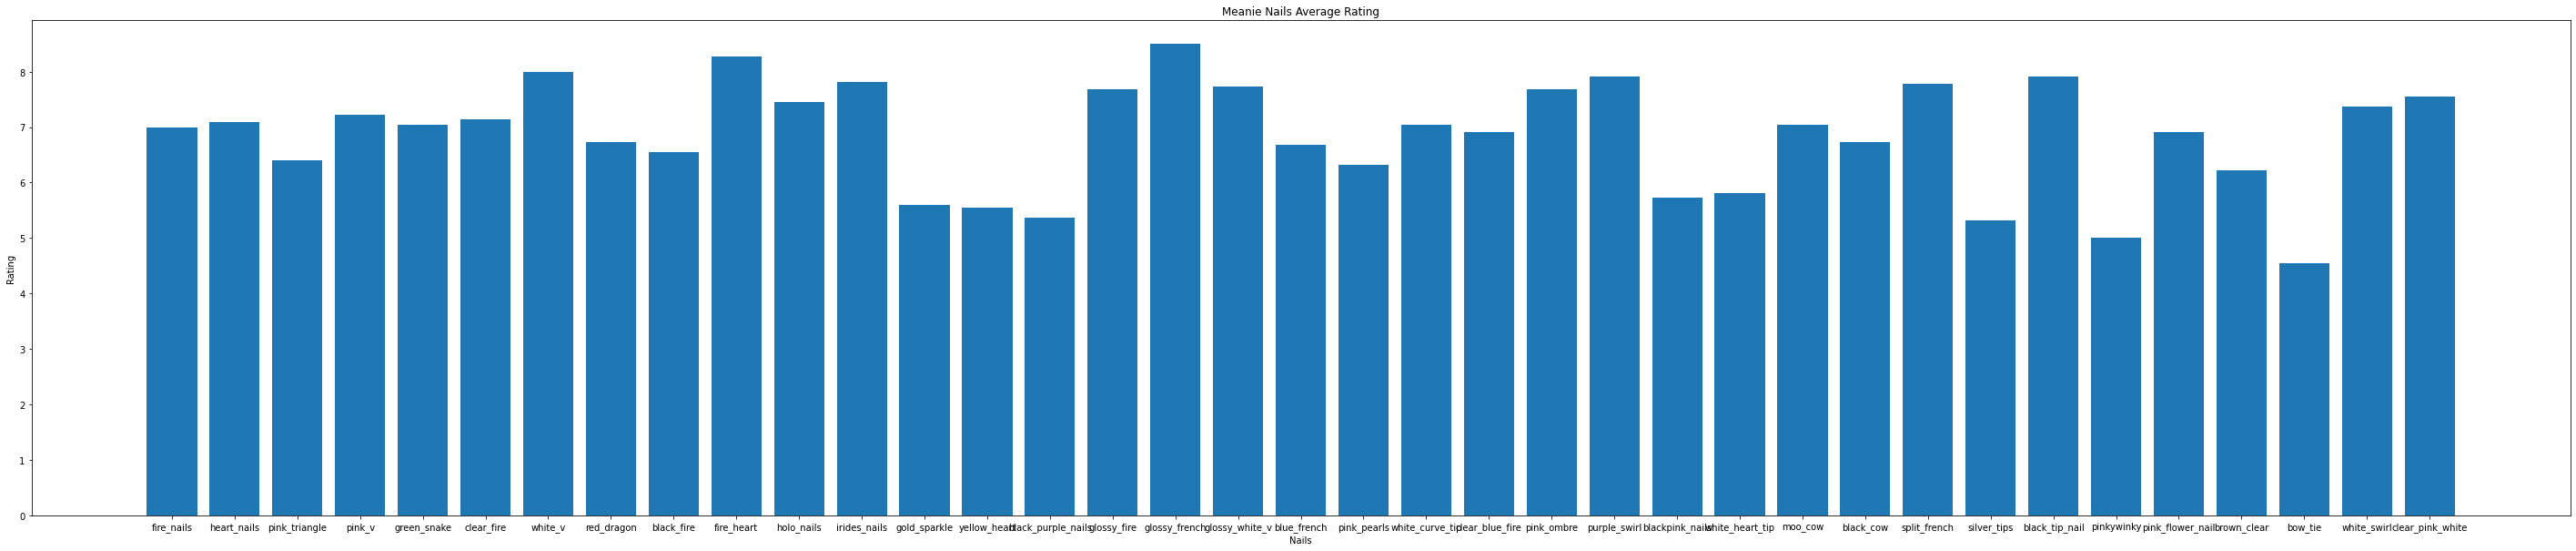

In [13]:
names = list(avg_ratings.keys())
means = list(avg_ratings.values())
plt.figure(figsize=(50, 10))
plt.bar(names,means)
plt.title('Meanie Nails Average Rating')
plt.xlabel('Nails')
plt.ylabel('Rating')
plt.show()

### 5.2 Median

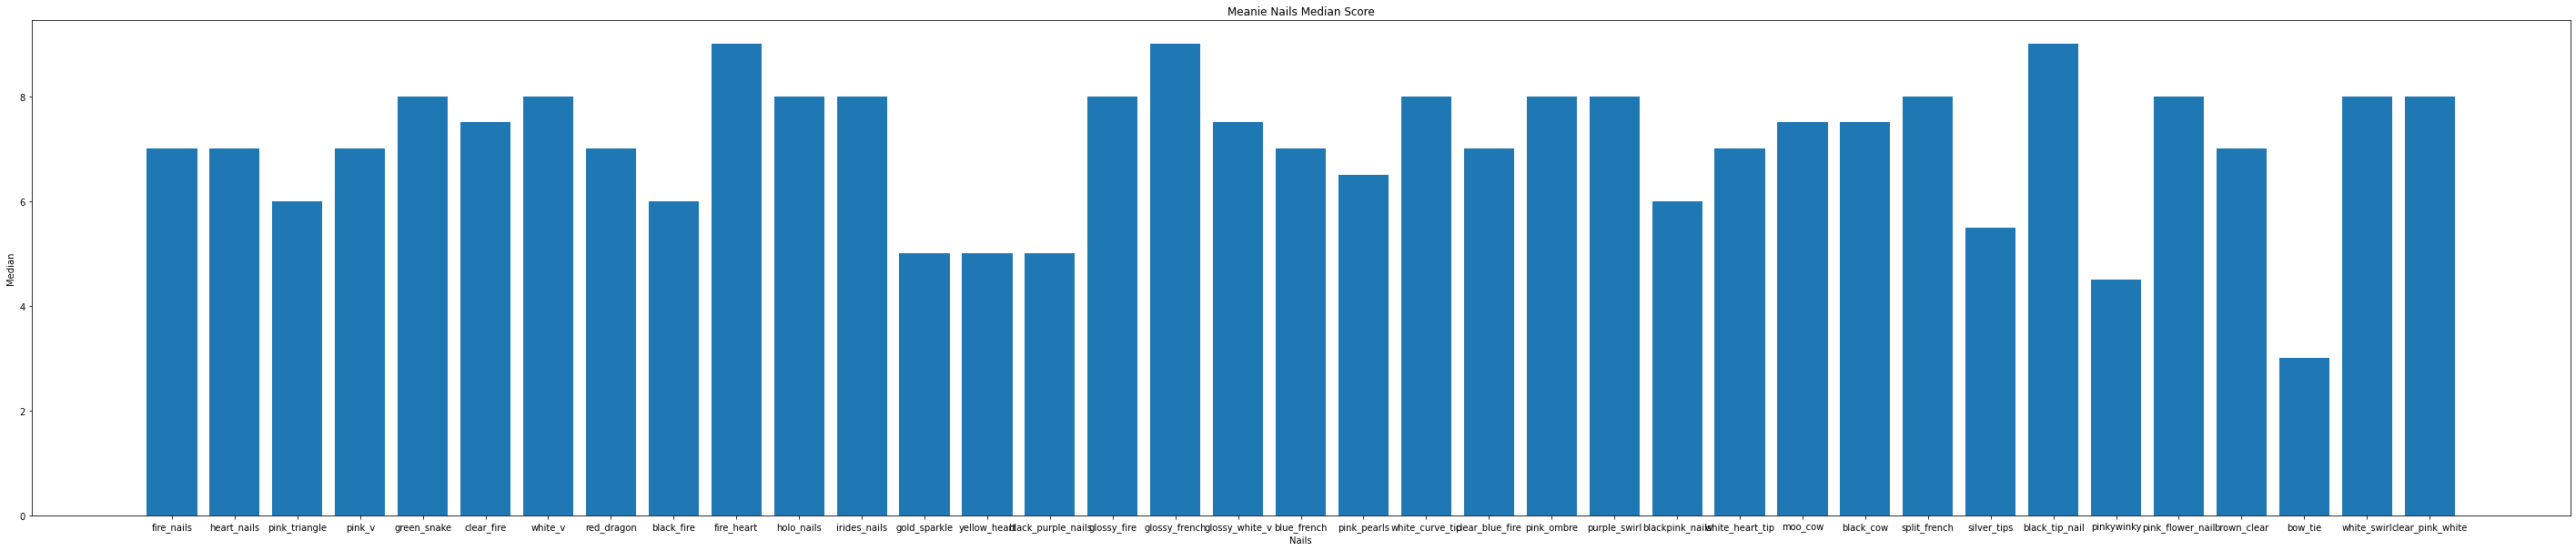

In [14]:
names = list(median_ratings.keys())
medians = list(median_ratings.values())
plt.figure(figsize=(50, 10))
plt.bar(names,medians)
plt.title('Meanie Nails Median Score')
plt.xlabel('Nails')
plt.ylabel('Median')
plt.show()

## 6. Results

From the results of my data analysis, we find six nails that are consistently **rated high**: [heart_nails](https://lh3.googleusercontent.com/QeAEft2p2DuXDaWGZ0sdz_RGl7y3qB8Z5mLjJ4p4k-L7gRrKIFjVrAHc5BavDZtMDfL3iiYs4rdc0-W5Djw2BYBwsb3s3RbhZWM0EqML14QYtHYYd4gfi42cDkFzPDJYeQ=w740), [pink_v](https://lh5.googleusercontent.com/o1JTW63PixqQKUfv7lDhAIZRBFAWUZhr1XP0Vqn9xobt06jjSzpSBpDz0cD7bFdRUf0uMHSNGc_9QZWbHbCmUb5DDlKcCbUcx3L5T1dTREBe45mfGildHBrhg_MGCyA8VQ=w740), [white_v](https://lh3.googleusercontent.com/z6ueKqWkYYYiqore-FxevwZDAzeOVUBu8BCzDFbkM_WXqXPp2djxDvveKqAZGyb9D4oLM20tkOAE7V1Fgz5FRwNYodp8wBO0hx-7ZW-MwvegUKSbtXWRxIgu-lmVPAHjOw=w740), [fire_heart](https://lh4.googleusercontent.com/R9qlQY2EdOP86Y_sPL2J_8o6RMjMYd6yu0ml_ZMzCweAMcRgSpBgpq5oC99aV7I_Vnj7nr6t_nhdU1A3BtmZs46s5QhasEOieZeKzV7TEV_7Vv2oP6Nz783cGHdXwhuF0w=w740), [glossy_french](https://lh5.googleusercontent.com/t_De09_FKAyVxJprfviFJlyNG2PKuokxtpzKhA226k40bl5CR9FEvjHGmfFeQbVdM6JRwOgRWo0MY51NLNy3bbbOHO-nS_-dn65Ab1RKRchopmvJPI5mWjopAkQqKL5zeA=w740), and [green_snake](https://lh6.googleusercontent.com/XpSXQBuhJXT1Q50d5nbdC_WkOdt-dmpQbSSz1u0H76yf2xh1ykoBitNhWE1paMphZEs_BTaB8jH-RdBi8O0W5KUQer2rvGXVyOcHT7G07bEfsaRSC30RwXx_VS8WFj9BfA=w740).<br> In contrast, we find four nails that are consistently **rated low**: [gold_sparkle](https://lh5.googleusercontent.com/TwiLuRavh1Pk1K6vPHdT9oxrDL95qkTvsrVUtX6f0NsHxGxTZJoqMKYTnmVhiSk6PIQ6vRpcDyK8wdMxmQCnV6rf3RiZpL5mppfD5QGc2A3R5fmUv8ssRQ9_LM-v52XM5A=w740), [pink_triangle](https://lh6.googleusercontent.com/Gu_CyMuwgzMquxYOkHzJptqK8iGetdihrbDwGgnPNPkxXTu9-AbkWM3ilHWsn3tx2pra5ri2LVStPLa5yiybHj4gbsRQLbNbH1U2I8_nJVkLeSELG-0KL8pJIE21C3isew=w740), [pinky winky](https://lh3.googleusercontent.com/JU0Uc29lNcdREa3ImRKSbSFOE-NIVANNDWtDr2-mbicSz5lBFw--lJIfAbTmmR-7wFrIGRsruvL6KD9sstoPW9DQgDKHG2Lj1a0M_0ZteVn0mSReBjfb2g7Dkhq-bgjLsw=w740), and [bow_tie](https://lh3.googleusercontent.com/sHOcBq9TX3hhvw6_OGiA6V6INhR46dSi_L4ckwLyKiMqt1cIBCfTh7cAjv2bvopEuwPwxFCpllalP08wveWTYSZ2cHqHaRHr51kePX2FpCW3OeBe5DkmMe7mexF0UHD8gQ=w740).
